In [14]:
from math import pi
import matplotlib.pyplot as plt
# from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now
import numpy as np
import time

In [15]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 37
np.random.seed(seed)
print(seed)

37


In [16]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits)])

    qml.RY(wires=0,phi=theta[0])
    qml.RZ(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    # qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    # return qml.probs(wires=[0])
    return qml.expval(qml.PauliZ(wires=0))

In [17]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [18]:

def f(theta,w,x):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [19]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
# del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, 
P_e1_val, P_e2, P_e3 = [ 1.43824549482149, 1.040964945989, 0.757527164510807]
del1_val0 = 0.26311938192951
w1_val0 = 1.0000224572268799
del2_val0 = 0.645867579445201
w2_val0 = 0.9999412583649352
del3_val0 = 0.5080124591284948
w3_val0 = 0.9999401685484266


In [20]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770)

In [21]:
cos = np.cos
sin = np.sin

In [22]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [23]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand

def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand

def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand

In [24]:
n_grid = 20
range_min = 6
range_max = 8
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

In [25]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    global w
    global theta
 
    # Reshape the flattened theta back to its original shape
    w = np.reshape(params[:w.size], w.shape)
    theta = np.reshape(params[w.size:], theta.shape)
    w1 = w[0]
    w2= w[1]
    w3 = w[2]
    theta1 = theta[0]
    theta2 = theta[1]
    theta3 = theta[2]


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f(theta1,w1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f(theta2,w2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f(theta3,w3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f(theta1,w1, t_data[i])
        u2[i + 1] = f(theta2,w2, t_data[i])
        u3[i + 1] = f(theta3,w3, t_data[i])


    u1[n_grid + 1]=f(theta1,w1, range_max + dt)  
    u2[n_grid + 1]=f(theta2,w2, range_max + dt)  
    u3[n_grid + 1]=f(theta3,w3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + 100*loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = (loss_i+loss_b) / len(t_data)
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss/10000


In [26]:
import numpy as np
from scipy.optimize import minimize
import random

# Initialize w and theta with random values
np.random.seed(20)  # Set a seed for reproducibility
# w = np.random.rand(3, 3)*0
# theta = np.random.rand(3, 4, 2)

w = np.array([np.zeros(3),np.zeros(3),np.zeros(3)])
theta = np.random.uniform(0, 2 * np.pi, size=(3,3))


# Create initial_params as a list
initial_params = [w, theta]

# Flatten initial_params into a 1D array
initial_params_flat = np.concatenate([initial_params[0].flatten(), initial_params[1].flatten()])
start_time = time.time()

# Call minimize with the wrapper function
result = minimize(loss, initial_params_flat, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

end_time = time.time()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Extract the optimized values of w and theta from the result
optimized_params_flat = result.x
w = np.reshape(optimized_params_flat[:w.size], w.shape)
theta = np.reshape(optimized_params_flat[w.size:], theta.shape)


# SAVE PARAMETERS
# Generate a random string for the file name
random_string = ''.join(random.choices('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789', k=8))

# Get the current time as a timestamp
timestamp = int(time.time())

# Combine the timestamp and random string to create the file name
file_name = f"{range_min}-{range_max}_data_{timestamp}_{random_string}.npz"

# Save the data to a file using np.savez
np.savez(file_name, w=w, theta=theta)

print(f"Data saved to file: {file_name}")

Current loss: 25855.59224146798
Current loss: 8866.610543152814
Current loss: 2296.9283290905423
Current loss: 438.42277923956533
Current loss: 411.9703811211853
Current loss: 398.99661967402386
Current loss: 287.90959164158113
Current loss: 270.70578218639645
Current loss: 211.67090689692103
Current loss: 194.7312758723928
Current loss: 165.47800284145077
Current loss: 145.55649170642016
Current loss: 115.58525455941667
Current loss: 64.04177000932361
Current loss: 34.039164887203675
Current loss: 27.322946763204392
Current loss: 16.996016149620218
Current loss: 5.75920885522433
Current loss: 3.1976441906022597
Current loss: 2.0228721259311326
Current loss: 1.9021296597401638
Current loss: 1.7399892025271053
Current loss: 1.6569721293288315
Current loss: 1.5840612901786784
Current loss: 1.481745645440189
Current loss: 1.4043174464320092
Current loss: 1.3496690392044803
Current loss: 1.3302698657217682
Current loss: 1.3207840373497675
Current loss: 1.3193186820854306
Current loss: 1.31

In [27]:
del1_target_values=[0.26311938192951, 0.26401412523750906, 0.2648723485680904, 0.26569552350536807, 0.26648505908864745, 0.2672422973965267, 0.267968584300693, 0.2686651704516547, 0.26933324041059925, 0.2699739392326469, 0.27058837246685086, 0.27117760615619735, 0.2717426668376057, 0.2722845415419281, 0.2728041777939498, 0.27330248361238896, 0.2737803275098969, 0.27423853849305774, 0.27467789915258234, 0.2750992166488899]
omega1_target_values=[1.000023020136394, 1.000022080912863, 1.0000211794882325, 1.0000203143254247, 1.0000194839249028, 1.0000186870513805, 1.0000179224668106, 1.0000171887675509, 1.0000164847705442, 1.000015809325479, 1.0000151613147867, 1.0000145396536444, 1.0000139432899722, 1.0000133712044357, 1.0000128224104439, 1.0000122959541509, 1.0000117909144544, 1.0000113064029967, 1.0000108416639841, 1.0000103959538091]
del2_target_values=[0.645867579445201, 0.6435891024905491, 0.6414007365947302, 0.6392991122808219, 0.6372809733758293, 0.635343180623757, 0.6334826215898749, 0.6316963527535855, 0.6299815522299244, 0.6283354850738471, 0.6267555032802284, 0.625239045783863, 0.6237836384594649, 0.6223868941216683, 0.6210465125250262, 0.6197602803640119, 0.6185260712730177, 0.6173418458263562, 0.6162056640164337, 0.6151155440467728]
omega2_target_values=[0.9999414196817715, 0.9999437330486862, 0.9999459600318034, 0.9999481038292716, 0.9999501677530505, 0.9999521535668677, 0.999954063125228, 0.9999558999896742, 0.9999576664418094, 0.9999593647583908, 0.9999609972113277, 0.9999625660676826, 0.9999640735896712, 0.9999655220346618, 0.999966913655176, 0.9999682506988881, 0.9999695354086253, 0.9999707700223682, 0.9999719559029536, 0.9999730941582992]
del3_target_values=[0.5080124591284948, 0.5066306873478736, 0.5053080158316353, 0.50404178779062, 0.5028295009066124, 0.5016688002148972, 0.5005572891654358, 0.49949280783173317, 0.49847333065238514, 0.4974969090782254, 0.49656167157232456, 0.49566582360999056, 0.49480764767876856, 0.493985503278441, 0.49319782692102754, 0.4924431321307851, 0.49172000944420785, 0.4910271264100272, 0.4903632313728563, 0.48972701132205004]
omega3_target_values=[0.999964411620829, 0.9999659352995065, 0.9999673903237204, 0.9999687804503699, 0.9999701093111831, 0.9999713791594245, 0.9999725924045508, 0.9999737524877573, 0.9999748617372376, 0.9999759224154674, 0.9999769367192036, 0.9999779067794848, 0.9999788346616312, 0.9999797223652448, 0.9999805718242089, 0.9999813849066884, 0.9999821634151301, 0.9999829090862621, 0.9999836230181689, 0.9999843062179078]

In [28]:
w1 = w[0]
w2= w[1]
w3 = w[2]
theta1 = theta[0]
theta2 = theta[1]
theta3 = theta[2]

20
20
0.2750992166488899


Text(0.5, 1.0, 'Fitting Data')

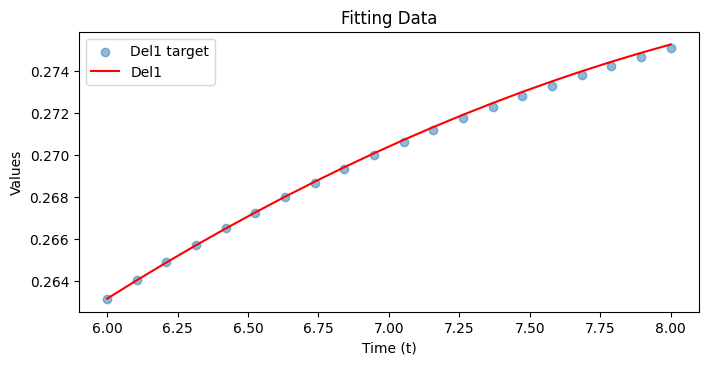

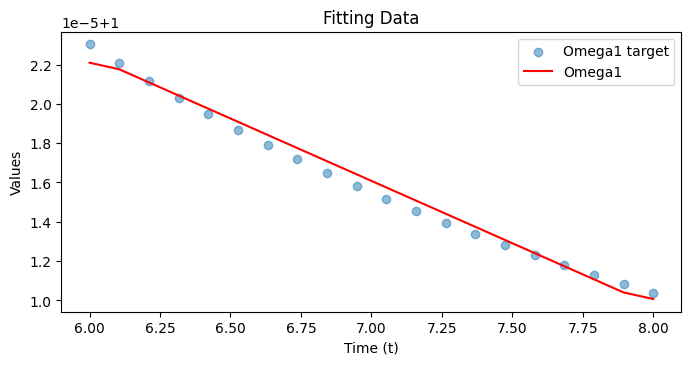

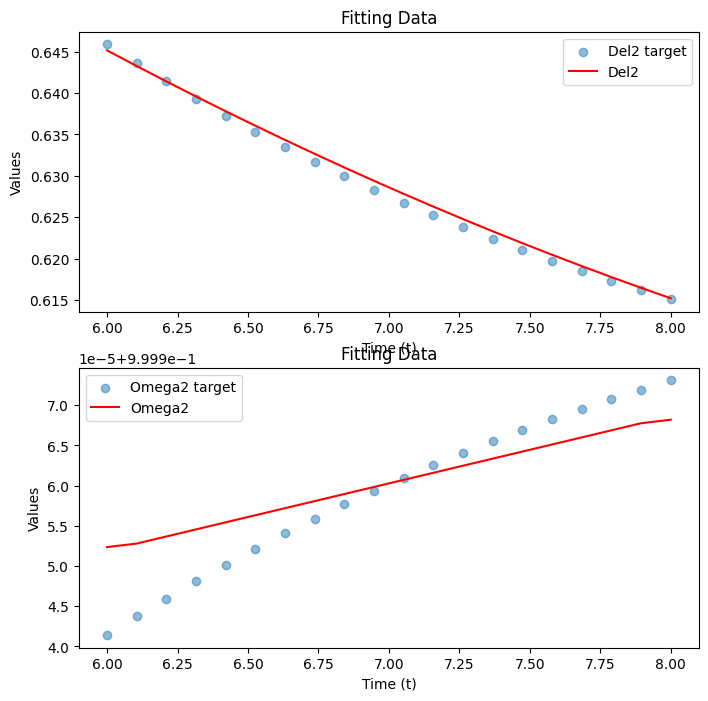

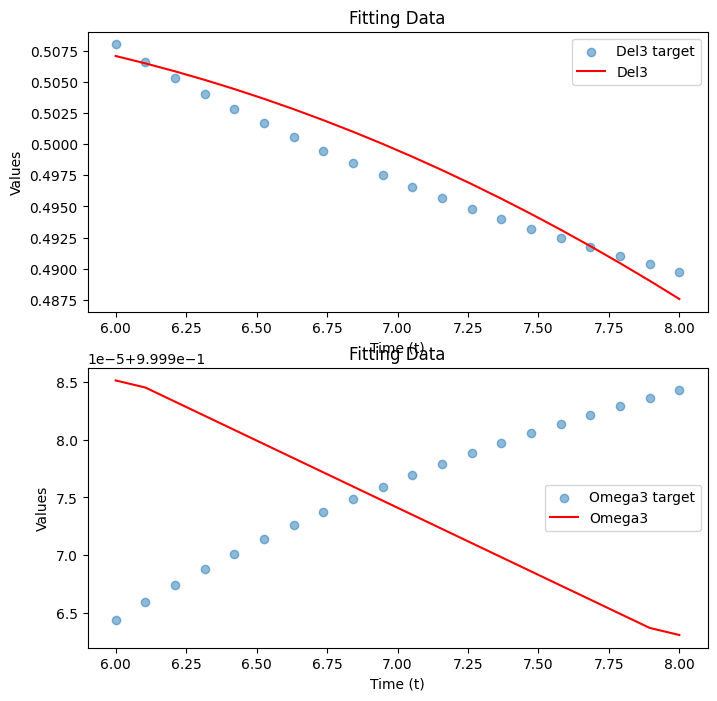

In [29]:
import matplotlib.pyplot as plt

# t2_data = [t_data[i] for i in range(0,len(t_data),2) ]
# del1_target_values_2 =  [del1_target_values[i] for i in range(0,len(del1_target_values),2) ]
# print(len(t2_data))
# print(len(del1_target_values_2))


print(len(t_data))
print(len(del1_target_values))



# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
delta_pred1 = [f(theta1,w1,ti) for ti in t_data]
plt.plot(t_data, delta_pred1, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

print(del1_target_values[-1])


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
delta_pred1_prime = np.gradient(delta_pred1, t_data)
omega_pred1 = (1/Ws)*delta_pred1_prime+1
plt.plot(t_data, omega_pred1, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
delta_pred2 = [f(theta2,w2,ti) for ti in t_data]
plt.plot(t_data, delta_pred2, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
delta_pred2_prime = np.gradient(delta_pred2, t_data)
omega_pred2 = (1/Ws)*delta_pred2_prime+1
plt.plot(t_data, omega_pred2, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
delta_pred3 = [f(theta3,w3,ti) for ti in t_data]
plt.plot(t_data, delta_pred3, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
delta_pred3_prime = np.gradient(delta_pred3, t_data)
omega_pred3 = (1/Ws)*delta_pred3_prime+1
plt.plot(t_data, omega_pred3, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')




In [30]:
print(delta_pred3)
print(del3_target_values)

[tensor(0.50708325, requires_grad=True), tensor(0.50649256, requires_grad=True), tensor(0.50585336, requires_grad=True), tensor(0.50516565, requires_grad=True), tensor(0.50442943, requires_grad=True), tensor(0.5036447, requires_grad=True), tensor(0.50281146, requires_grad=True), tensor(0.50192972, requires_grad=True), tensor(0.50099946, requires_grad=True), tensor(0.5000207, requires_grad=True), tensor(0.49899343, requires_grad=True), tensor(0.49791765, requires_grad=True), tensor(0.49679336, requires_grad=True), tensor(0.49562057, requires_grad=True), tensor(0.49439926, requires_grad=True), tensor(0.49312945, requires_grad=True), tensor(0.49181113, requires_grad=True), tensor(0.4904443, requires_grad=True), tensor(0.48902896, requires_grad=True), tensor(0.48756511, requires_grad=True)]
[0.5080124591284948, 0.5066306873478736, 0.5053080158316353, 0.50404178779062, 0.5028295009066124, 0.5016688002148972, 0.5005572891654358, 0.49949280783173317, 0.49847333065238514, 0.4974969090782254, 0

In [33]:
print('del1_val0 =',del1_target_values[-1])
print('w1_val0 =',omega_pred1[-1])
print('del2_val0 =',del2_target_values[-1])
print('w2_val0 =',omega_pred2[-1])
print('del3_val0 =',del3_target_values[-1])
print('w3_val0 =',omega_pred3[-1])


del1_val0 = 0.2750992166488899
w1_val0 = 1.0000100730942103
del2_val0 = 0.6151155440467728
w2_val0 = 0.9999682086377139
del3_val0 = 0.48972701132205004
w3_val0 = 0.9999631117244979


In [34]:
print('del1=',[float(delta_pred1[i]) for i in range(len(delta_pred1))])
print('del2=',[float(delta_pred2[i]) for i in range(len(delta_pred2))])
print('del3=',[float(delta_pred3[i]) for i in range(len(delta_pred3))])
print('omega1=',[float(omega_pred1[i]) for i in range(len(omega_pred1))])
print('omega2=',[float(omega_pred2[i]) for i in range(len(omega_pred2))])
print('omega3=',[float(omega_pred3[i]) for i in range(len(omega_pred3))])


del1= [0.26313518269093344, 0.2640118359152952, 0.2648619935913251, 0.26568565571902325, 0.2664828222983898, 0.2672534933294247, 0.2679976688121278, 0.2687153487464991, 0.26940653313253893, 0.27007122197024663, 0.27070941525962305, 0.2713211130006673, 0.2719063151933802, 0.27246502183776117, 0.27299723293381073, 0.27350294848152834, 0.27398216848091417, 0.27443489293196843, 0.2748611218346908, 0.27526085518908183]
del2= [0.6451472535822982, 0.6432567062839123, 0.6414011013170813, 0.6395804386818055, 0.6377947183780848, 0.6360439404059187, 0.6343281047653079, 0.6326472114562516, 0.6310012604787509, 0.6293902518328047, 0.6278141855184137, 0.6262730615355777, 0.6247668798842967, 0.6232956405645704, 0.6218593435763993, 0.6204579889197831, 0.6190915765947219, 0.6177601066012158, 0.6164635789392645, 0.6152019936088683]
del3= [0.5070832514968301, 0.5064925579677331, 0.5058533558828925, 0.5051656452423092, 0.504429426045981, 0.5036446982939085, 0.5028114619860921, 0.5019297171225319, 0.5009994